## Gateway Switch
This notebook looks into the gateways for each data points and analyzed the gateway switches.

In [230]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

%matplotlib inline

In [100]:
%store -r 

In [101]:
sensors = list(dataframes_100.keys())

In [102]:
# funciton to find the columns that have gateway id
import re

def check_format(word):
    pattern = r'^gw_\w+_id$'
    match = re.match(pattern, word)
    return bool(match)

In [103]:
for i, sensor in enumerate(sensors):
    df = dataframes_100[sensor]
    #df.dropna(inplace=True)
    df['Gateway_List'] = None
    #print(df.shape)
    
    for index, row in df.iterrows():
        gateway_list = []
        columns_list = row.index.tolist()
        for column in columns_list:
            if check_format(column):
                gateway = row[column]
                if type(gateway) == str:
                    gateway_list.append(gateway)
                
        #print(gateway_list)
        df.at[index, 'Gateway_List'] = gateway_list 
    dataframes_100[sensor] = df
        
# cleaned_list = [x for x in my_list if not math.isnan(x)]
    

In [104]:
gateway_stats = {} ## This variable holds the detail of gateway for all the sensors and count of how many times did sensor see each gateway 
for sensor in sensors:
    df = dataframes_100[sensor]
    #df.dropna(inplace=True)
    gateway_stats[sensor] = {}
    for gateway_list in df['Gateway_List']:
        for gateway in gateway_list:
            if gateway in gateway_stats[sensor]:
                gateway_stats[sensor][gateway] += 1
            else:
                gateway_stats[sensor][gateway] = 1

In [109]:
gateway_communication_stats = {} ## This variable holds the detail of gateway sensor communicated to 
for sensor in sensors:
    df = dataframes_100[sensor]
    gateway_communication_stats[sensor] = {}
    for gateway_list in df['Gateway_List']:
        #print(gateway_list)
        if gateway_list:
            if gateway_list[0] in gateway_communication_stats[sensor]:
                gateway_communication_stats[sensor][gateway_list[0]] += 1
            else:
                gateway_communication_stats[sensor][gateway_list[0]] = 1

In [145]:
sns.set(rc = {'figure.figsize':(8,6)})
%config InlineBackend.figure_format = 'retina'

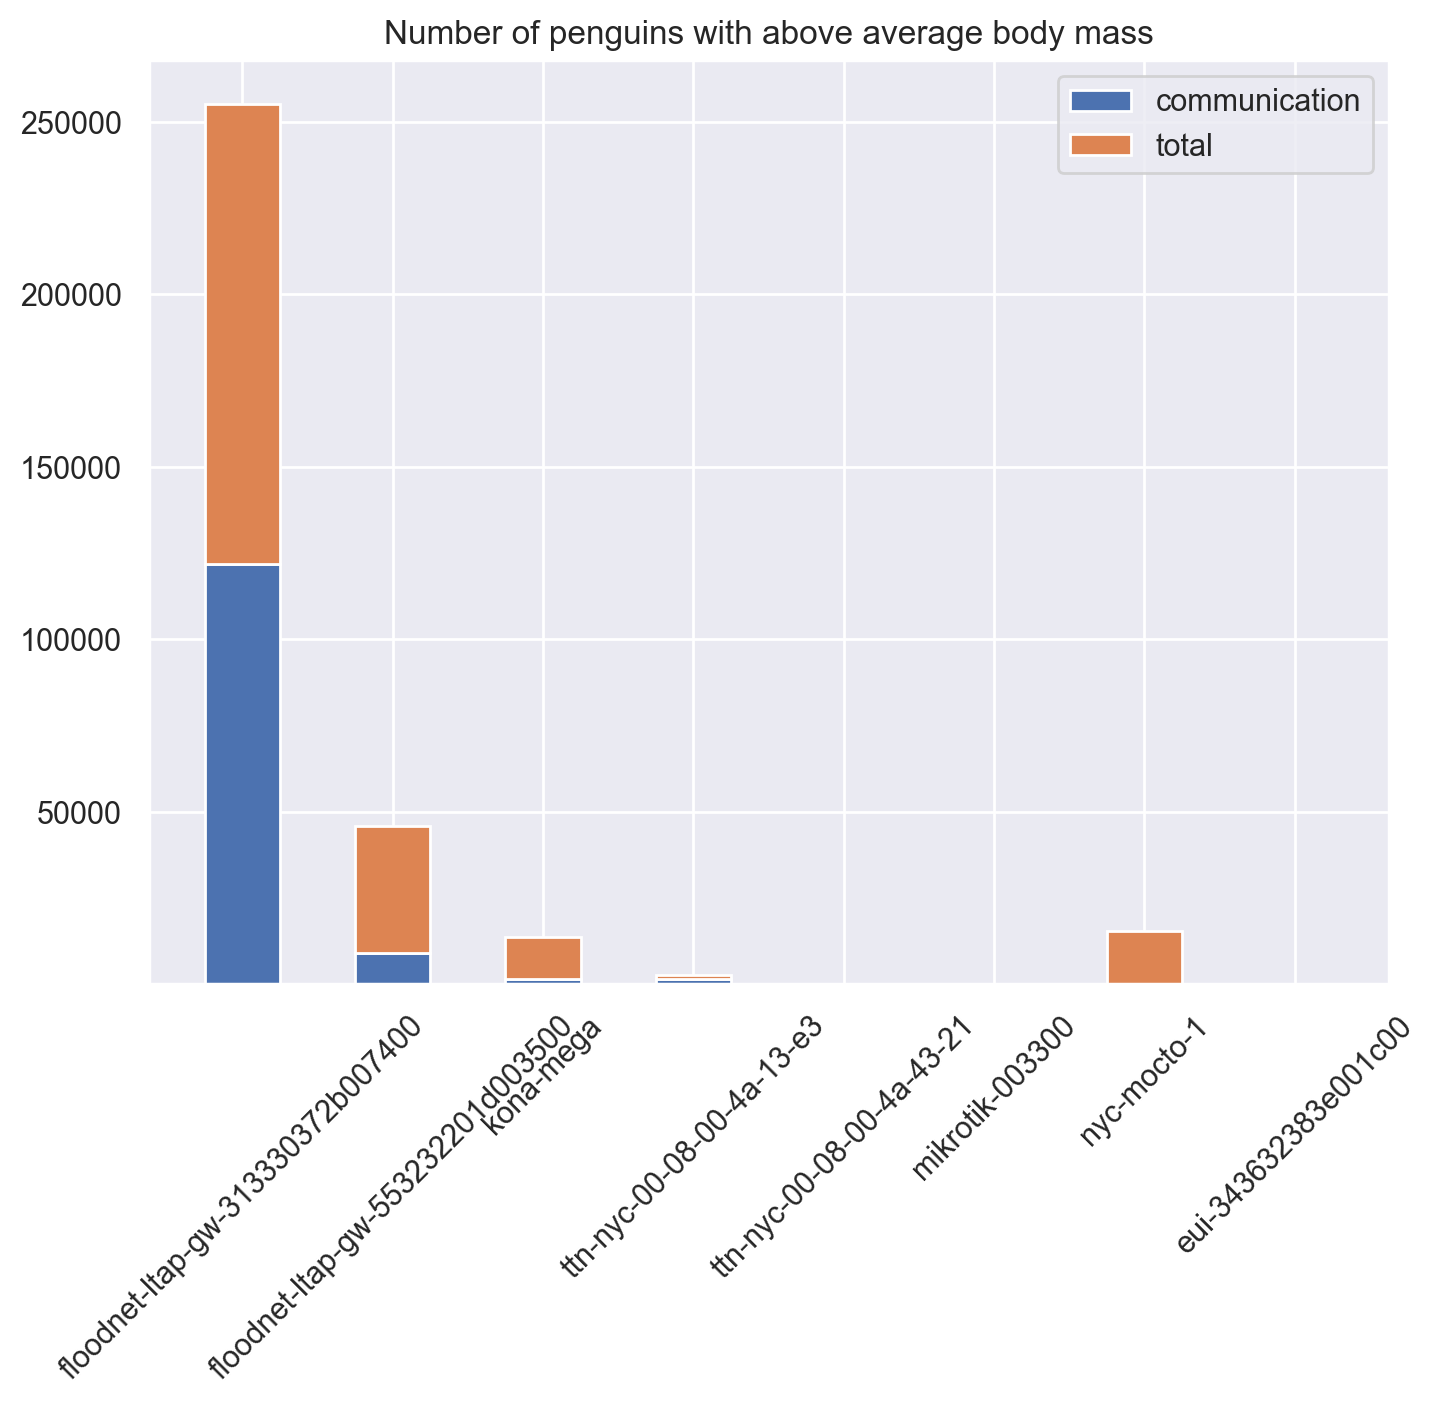

In [164]:
for sensor in sensors[:1]:
    com_data_dict = gateway_communication_stats[sensor]
    
    keys = list(com_data_dict.keys())
    com_values = list(com_data_dict.values())
    
    data_dict = gateway_stats[sensor]
    values = []
    for key in data_dict.keys():
        if key in keys:
            values.append(data_dict[key])
    #values = list(data_dict[keys].values())
    


#     # Plot the values
#     sns.barplot(y = keys, x = values, orient = 'h')
#     #ax1.xticks(rotation=45, ha='right')
#     plt.xticks(rotation=90)
    
# #     ax2.bar(keys, values)
# #     #ax2.xticks(rotation=45, ha='right')
    
# #     plt.xticks(rotation=45)
    
    
    
    weight_counts = {
    "communication": np.array(com_values),
    "total": np.array(values)
    }
    
    width = 0.5

    fig, ax = plt.subplots()
    bottom = np.zeros(8)

    for boolean, weight_count in weight_counts.items():
        p = ax.bar(tuple(keys), weight_count, width, label=boolean, bottom=bottom)
        bottom += weight_count

    ax.set_title("Number of penguins with above average body mass")
    ax.legend(loc="upper right")
    plt.xticks(rotation=45)

    plt.show()

In [152]:
keys

['floodnet-ltap-gw-313330372b007400',
 'floodnet-ltap-gw-553232201d003500',
 'kona-mega',
 'ttn-nyc-00-08-00-4a-13-e3',
 'ttn-nyc-00-08-00-4a-43-21',
 'mikrotik-003300',
 'nyc-mocto-1',
 'eui-343632383e001c00']

In [153]:
com_values

[121947, 9261, 1601, 1610, 21, 3, 1, 1]

In [154]:
values

[133054, 36621, 12171, 1278, 32, 6, 15586, 2]

In [165]:
gateway_stats['daily_new_falcon']

{'floodnet-lr9-gw-3235313229006900': 135290,
 'ttn-nyc-00-08-00-4a-43-21': 77330,
 'eui-343632383e001c00': 68985,
 'kona-mega': 15428,
 'mikrotik-003300': 14779,
 'floodnet-ltap-gw-313330372b007400': 2714}

In [166]:
gateway_communication_stats['daily_new_falcon']

{'floodnet-lr9-gw-3235313229006900': 135151,
 'eui-343632383e001c00': 1433,
 'ttn-nyc-00-08-00-4a-43-21': 566,
 'kona-mega': 247,
 'mikrotik-003300': 72,
 'floodnet-ltap-gw-313330372b007400': 8}

In [276]:
df = dataframes_100['daily_new_falcon'][130000:]
df['gw_indicator'] = None
for index, row in df.iterrows():
    val = indexing_dict[row['gw_1_id']]
    df.loc[index, 'gw_indicator'] = val

/Users/ashoktimsina/Desktop/Floodnet2/floodnet/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ashoktimsina/Desktop/Floodnet2/floodnet/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [277]:
indexing_dict = {'floodnet-lr9-gw-3235313229006900': 1,
 'eui-343632383e001c00': 2,
 'ttn-nyc-00-08-00-4a-43-21': 3,
 'kona-mega': 4,
 'mikrotik-003300': 5,
 'floodnet-ltap-gw-313330372b007400': 6}

In [278]:
df.index

RangeIndex(start=130000, stop=137477, step=1)

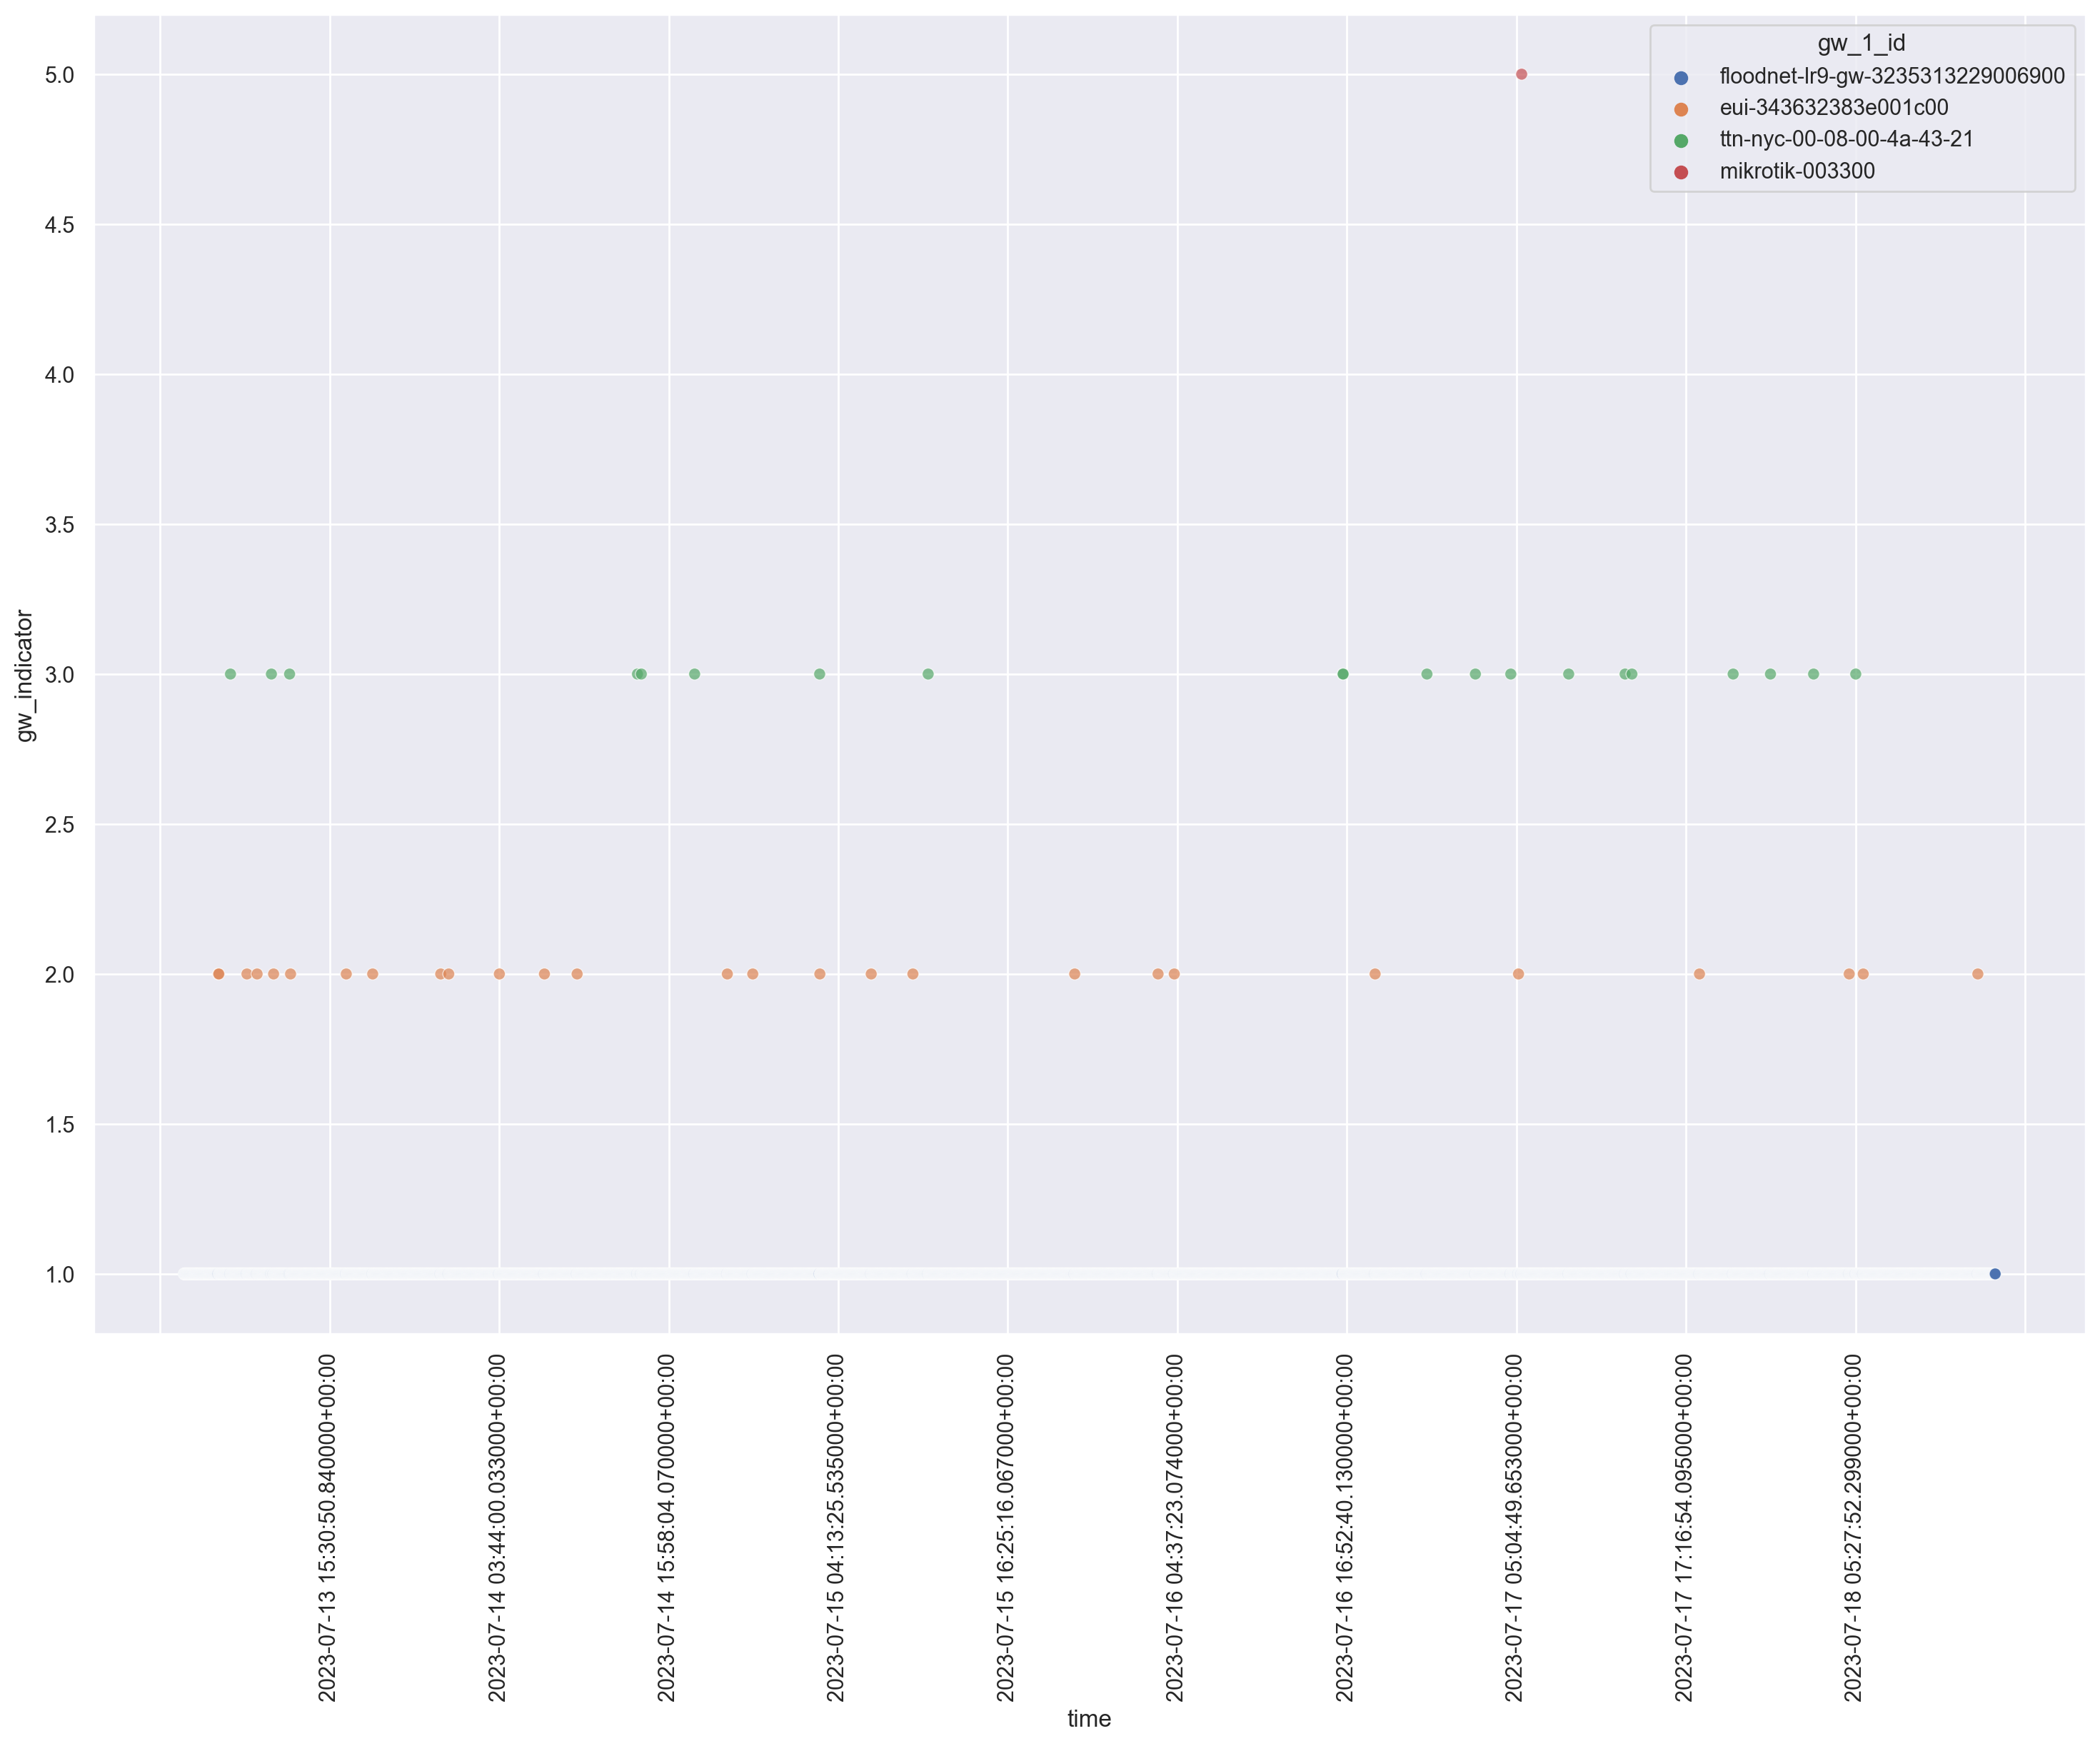

In [291]:
sns.set(rc = {'figure.figsize':(18,12)})

import matplotlib.dates as mdates
ax = sns.scatterplot(x = 'time', y = 'gw_indicator', data = df, hue='gw_1_id', alpha=0.7)



# #               , hue = 'gw_1_id',)
#date_form = DateFormatter("%m-%d")
#locator = mdates.AutoDateLocator(minticks=1, maxticks=2)


formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=100))
plt.xticks(rotation=90)

plt.show()



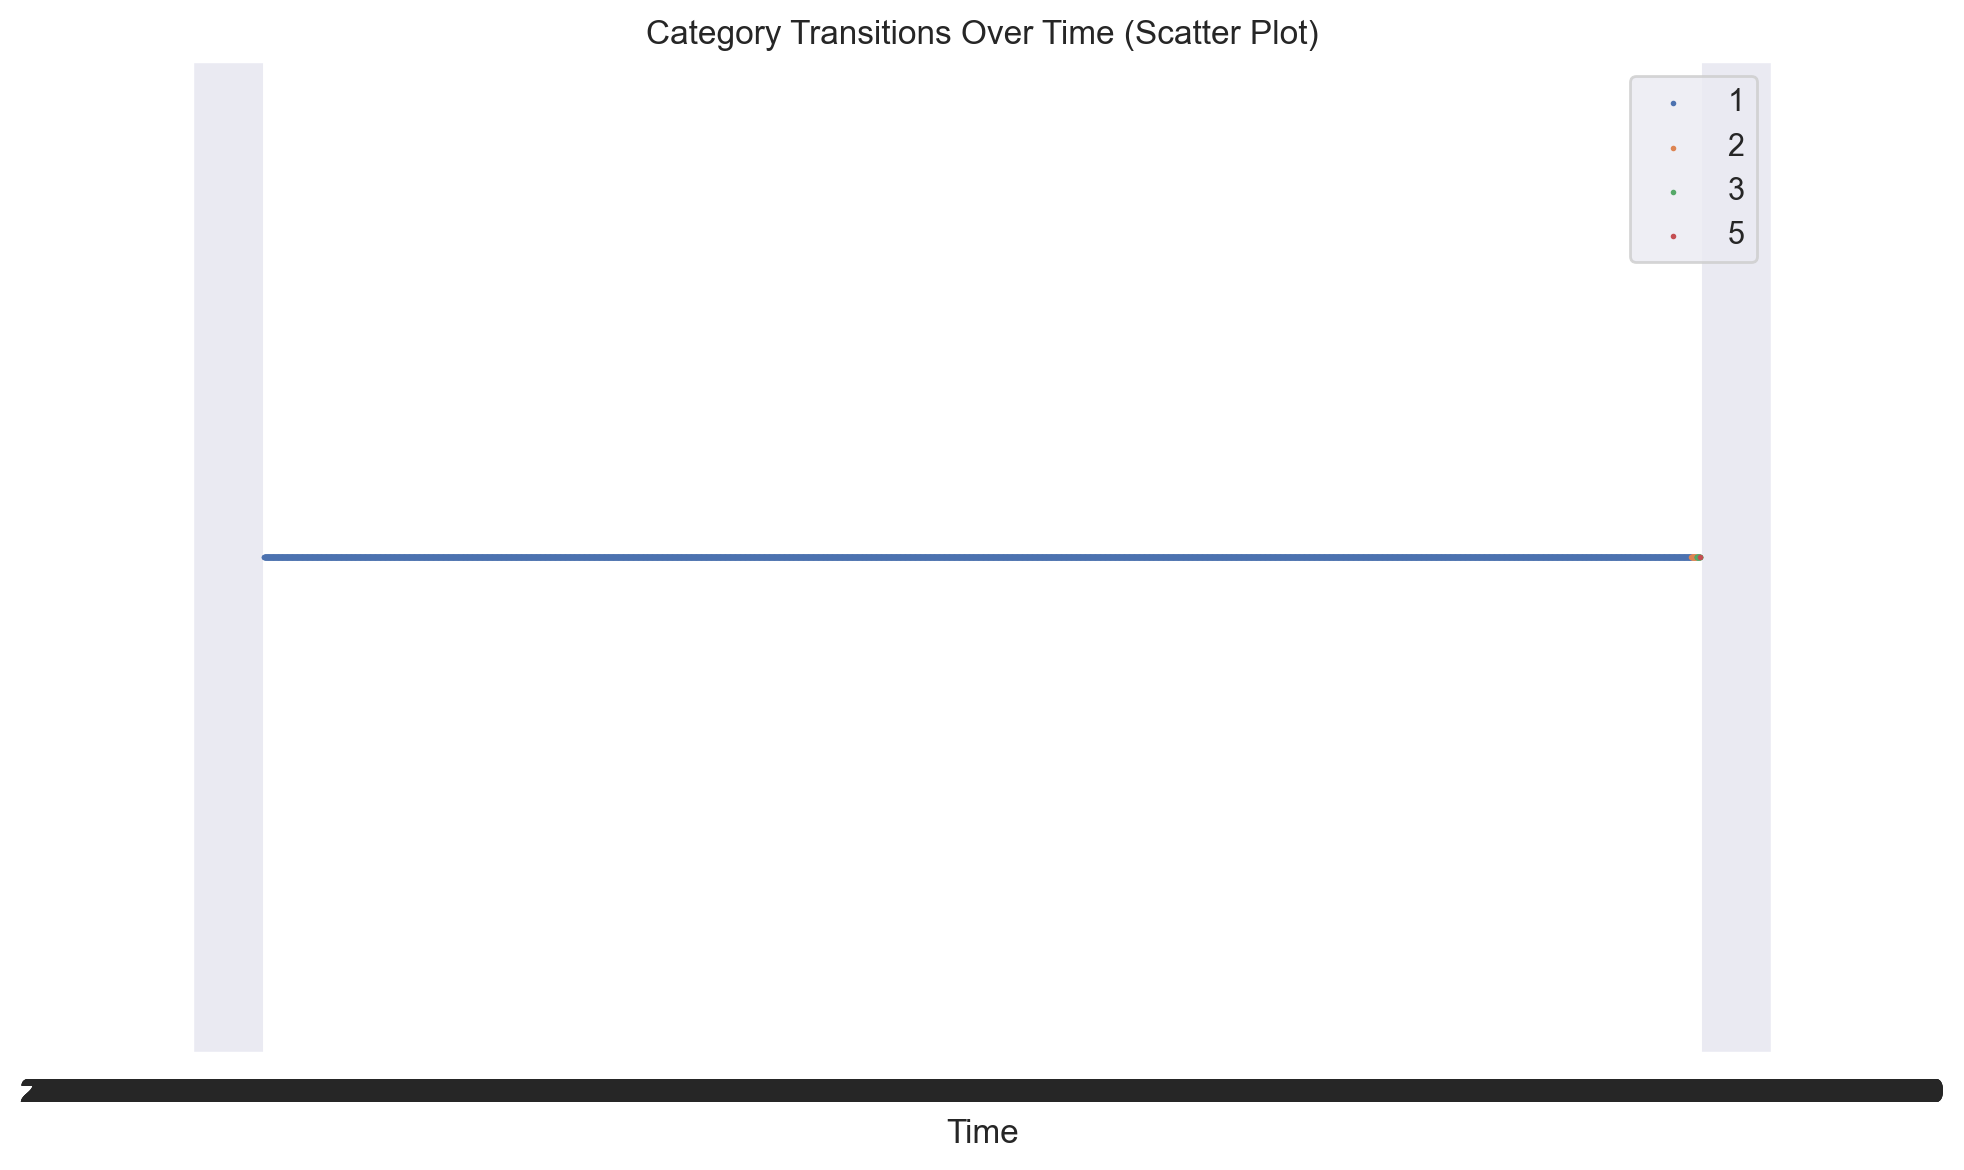

In [293]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'time' and 'category' columns

# Create a scatter plot with time on the x-axis and different colors for each category
plt.figure(figsize=(10, 6))
for category, data in df.groupby('gw_indicator'):
    plt.scatter(data['time'], [1] * len(data), label=category, marker='o', s=1)
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('Time')
plt.title('Category Transitions Over Time (Scatter Plot)')
plt.legend()
plt.tight_layout()
plt.show()

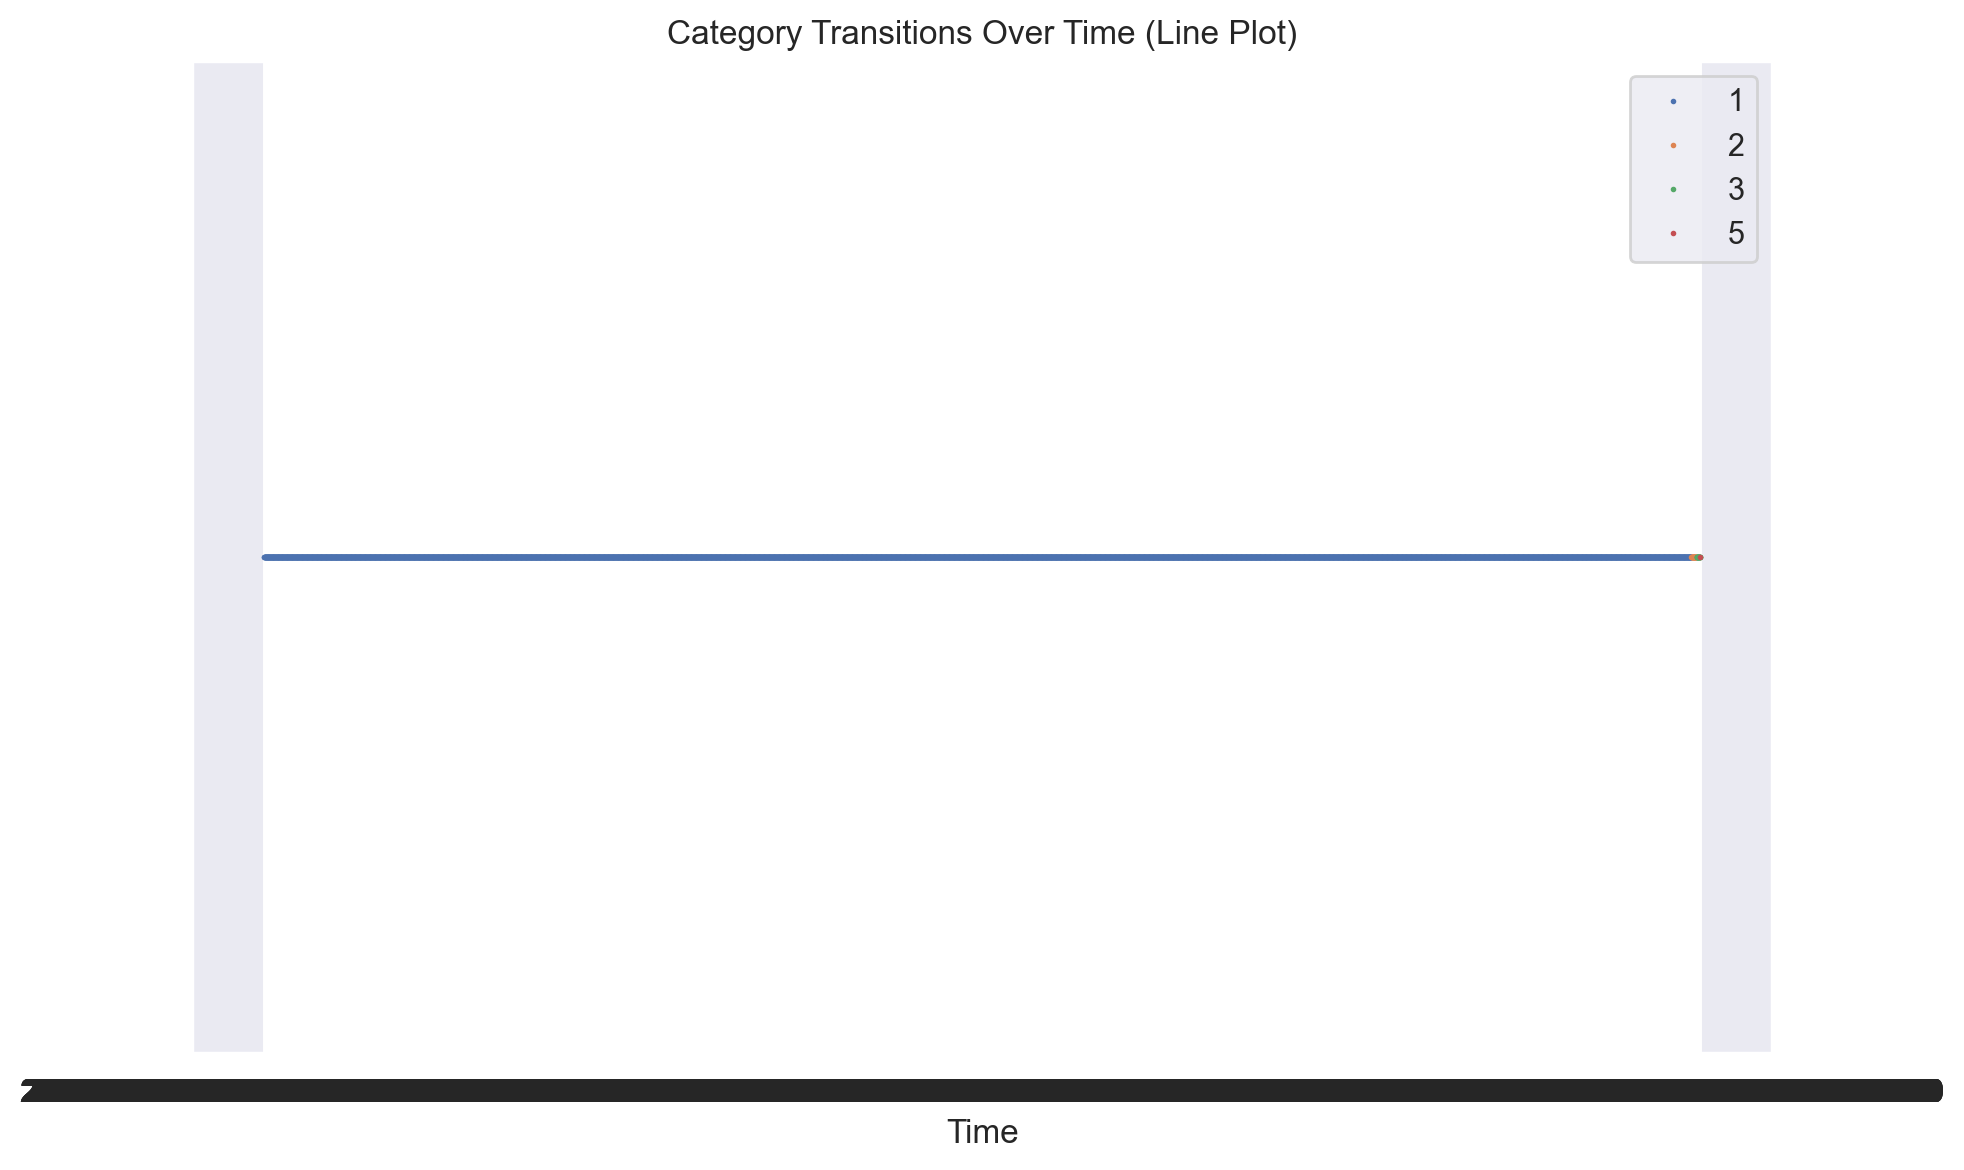

In [295]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'time' and 'category' columns

# Create a line plot with time on the x-axis and different colors for each category
plt.figure(figsize=(10, 6))
for category, data in df.groupby('gw_indicator'):
    plt.plot(data['time'], [1] * len(data), 'o', label=category, markersize=1)
plt.yticks([])  # Hide y-axis ticks
plt.xlabel('Time')
plt.title('Category Transitions Over Time (Line Plot)')
plt.legend()
plt.tight_layout()
plt.show()


In [328]:
switches_count = {}
for sensor in sensors:
    count = 0
    df = dataframes_100[sensor]
    for i in range(len(df['Gateway_List'])-1):
        if df['Gateway_List'][i]:
            if df['Gateway_List'][i][0] not in df['Gateway_List'][i+1]:
                # print(df['Gateway_List'][i])
                # print(df['Gateway_List'][i+1])
                count += 1
    switches_count[sensor] = count
    
    percentage = (count/df.shape[0])*100
    if percentage > 5:
        print(f'For sensor {sensor} out of total {df.shape[0]} data points, there  were {count} switches that is {(count/df.shape[0])*100}% .')

For sensor light_maroon_penguin out of total 135370 data points, there  were 10799 switches that is 7.97739528699121% .
For sensor bored_blue_fish out of total 14518 data points, there  were 5368 switches that is 36.97478991596639% .
For sensor lovely_helped_lamb out of total 19941 data points, there  were 8076 switches that is 40.49947344666767% .
For sensor duly_star_bee out of total 88038 data points, there  were 10920 switches that is 12.403734750903018% .
For sensor daily_gentle_beetle out of total 38324 data points, there  were 16022 switches that is 41.806700761924645% .
For sensor mainly_whole_slug out of total 52727 data points, there  were 15807 switches that is 29.97894816697328% .
For sensor weekly_poetic_guinea out of total 38737 data points, there  were 20105 switches that is 51.90128301107468% .
For sensor early_still_frog out of total 5158 data points, there  were 1206 switches that is 23.381155486622724% .
For sensor clearly_bored_turtle out of total 77718 data points,

In [318]:
gateway_stats[sensor]

{'floodnet-ltap-gw-313330372b007400': 133054,
 'floodnet-ltap-gw-553232201d003500': 36621,
 'kona-mega': 12171,
 'ttn-nyc-00-08-00-4a-43-21': 1278,
 'mikrotik-003300': 32,
 'eui-343632383e001c00': 6,
 'ttn-nyc-00-08-00-4a-13-e3': 15586,
 'nyc-mocto-ttig-1': 1,
 'nyc-mocto-1': 2,
 'fngw-10000': 60,
 'ttn-nyc-00-08-00-4a-1e-99': 1}

In [319]:
gateway_communication_stats[sensor]

{'floodnet-ltap-gw-313330372b007400': 121947,
 'floodnet-ltap-gw-553232201d003500': 9261,
 'kona-mega': 1601,
 'ttn-nyc-00-08-00-4a-13-e3': 1610,
 'ttn-nyc-00-08-00-4a-43-21': 21,
 'mikrotik-003300': 3,
 'nyc-mocto-1': 1,
 'eui-343632383e001c00': 1}

In [315]:
sensor

'light_maroon_penguin'